# <font color = "474973"> Different Matplotlib Chart Types </font> 

For the Demonstrations of various charts, we will be using the same dataset as used in the previous notebook - Hotel Customer Data  

## <font color = "364652"> Importing the required libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color = "364652"> Importing the data set </font>

In [2]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [4]:
# creating the Dataset for the Quarterly booking and cancellation & Noshow
room_nights = hotels.groupby("date").agg({"RoomNights":"sum", "BookingsCanceled":"sum", "BookingsNoShowed":"sum"})
Quarterly_bookings = room_nights.resample("Q").sum()

In [5]:
Quarterly_bookings.head()

,RoomNights,BookingsCanceled,BookingsNoShowed
date,,,
2016-03-31,8464,15,8
2016-06-30,15535,26,7
2016-09-30,19517,27,5
2016-12-31,15404,17,3
2017-03-31,15206,12,5


## <font color = "364652"> Plotting Different Maplotlib Charts </font>

### <font color='005377'> Line Chart </font>

Line charts are used for showing trends over time. To create a line chart we use <font color = "red"> ax.plot()</font>method.
<br>
<b>ax.plot(x-series, series value, formating options)</b> // if you dont specify the x-series, the index will be used instead. 
<br><br>
<b>Tip to plot better Line Chart</b><br>
        1. Pivot the tabular data to turn each unique series into DataFrame column, and set Date/time as index.<br>
        2. To avoid the scientific notation, divide your series by appropriate units while plotting to simply the axis. 

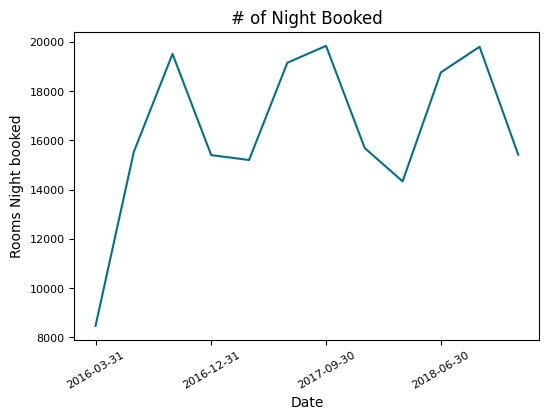

In [6]:
# Plotting the line chart for Total nights booked each Quarter

#Defining the figure and axes object
fig, ax = plt.subplots(figsize = (6,4))

#plotting the line chart
ax.plot(Quarterly_bookings.index, Quarterly_bookings["RoomNights"], color = "#007090");


#setting the title(s)
ax.set_title("# of Night Booked")


#Setting x-label and customizing the x-ticks
ax.set_xlabel("Date")
ax.set_xticks(Quarterly_bookings.index[::3]);
plt.xticks(fontsize = 8, rotation = 30);


#Setting y-label and customizing the x-ticks
ax.set_ylabel("Rooms Night booked")
plt.yticks(fontsize = 8);

Although we can further modify the chart  above by adding the vertical line at the points where the booking was lowest. But we be doing the basic and will skip those beautification methods which are already covered for clarity purposes.  

### <font color='005377'> Stack Line Chart </font>

Stackplot is used to draw a stacked area plot. It displays the complete data for visualization. It shows each part stacked onto one another and how each part makes the complete figure.The idea of stack plots is to show <b>“parts to the whole”</b> over time. It is used to represent various datasets without overlapping over each other.
<br>
The <font color = "red">ax.stackplot()</font> to create a stacked line chart, which lets you visualize the overall trend by time, as well as the composition by series. 
<br>

<b> Note:</b><br>
    1. The columns are stacked on the graph in the order they are passed in the function. <br>
    2. All the other parameters are passed in a similar fashion as in the line chart. <br> 
    3. Usually we keep the most significant series at the bottom (since it's most visible) to draw attention for individual trend. <br>
    4. The stack charts are appropriate to study the evolution of the whole and the relative proportions of each group, but not to study the evolution of each individual group

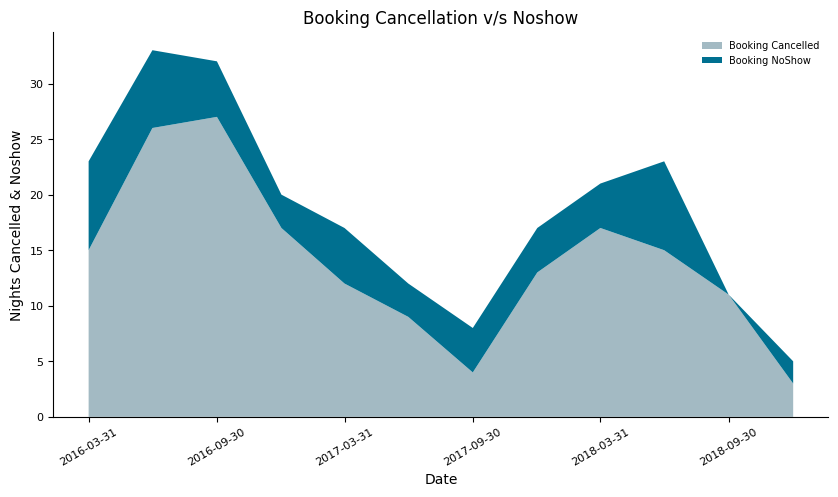

In [7]:
# Plotting the stack chart for Nightsfor which booking was cancelled or there was a noshow. 
# both of them are related category - lose making nights for the hotel


#Defining the figure and axes object
fig, ax = plt.subplots(figsize = (10,5))


#plotting the stack line chart
ax.stackplot(Quarterly_bookings.index, 
             Quarterly_bookings["BookingsCanceled"], 
             Quarterly_bookings["BookingsNoShowed"], 
             lw = 0.4, 
             labels = ["Booking Cancelled", "Booking NoShow"], 
             colors = ["#A3BAC3", "#007090" ]
        );


#setting the title(s)
ax.set_title("Booking Cancellation v/s Noshow")


#Setting x-label and customizing the x-ticks
ax.set_xlabel("Date")
ax.set_xticks(Quarterly_bookings.index[::2]);
plt.xticks(fontsize = 8, rotation = 30);


#Setting y-label and customizing the y-ticks
ax.set_ylabel("Nights Cancelled & Noshow")
plt.yticks(fontsize = 8);

#Setting for Chart spines
ax.spines[["top", "right"]].set_visible(False)

#Setting for legends
ax.legend(frameon = False, fontsize = 7);


###  <font color='005377'> Dual Axis Line chart </font>

When we need to plot two variables of different scale on the same axes, we plot the dual axis chart. In such cases we use <font color = "red">ax.twinx()</font> method to plot a secondary axes with shared x-axis. <br>
here is another function named <b>twiny()</b> used to create a secondary axis with shared y-axis<br>
In such cases, we put the legend and titles on the figure level, so that the legend picks all the series available to us. 

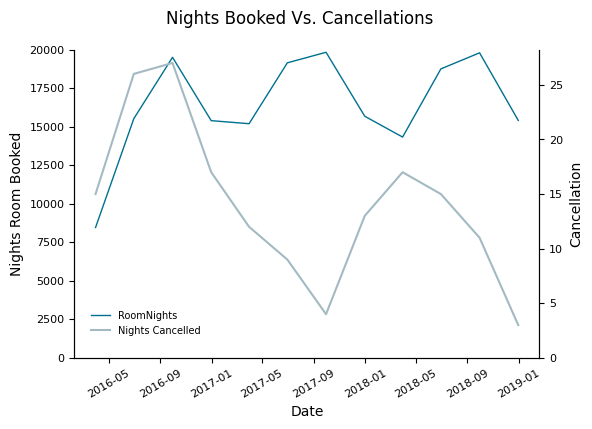

In [8]:
# plotting a Dual axis chart for sum of nights booked and the sum of cancellations on a quarterly basis


#Defining the figure and axes object
fig, ax = plt.subplots(figsize = (6,4))


#plotting the line chart for # of rooms booked
ax.plot(Quarterly_bookings.index, 
             Quarterly_bookings["RoomNights"], 
             lw = 1, 
             label = "RoomNights", 
             color = "#007090" 
        );


#Setting x-label and customizing the x-ticks
ax.set_xlabel("Date")
plt.xticks(fontsize = 8, rotation = 30);


#Setting primary y-label and customizing the y-ticks
ax.set_ylabel("Nights Room Booked")
ax.set_ylim(0,20000);
plt.yticks(fontsize = 8);


#Creating the secondary axis with twinx
ax_sec = ax.twinx()

#using the secondary axis to plot the second line chart
ax_sec.plot(Quarterly_bookings.index,
             Quarterly_bookings["BookingsCanceled"],
             label = "Nights Cancelled", 
             color = "#A3BAC3" );

#Setting secondary y-label and customizing the y-ticks
ax_sec.set_ylabel("Cancellation")
ax_sec.set_ylim(0);
plt.yticks(fontsize = 8);


#setting the title(s)
fig.suptitle("Nights Booked Vs. Cancellations")

#Setting for Chart spines
ax.spines[["top"]].set_visible(False)
ax_sec.spines[["top"]].set_visible(False)

#Setting for legends
fig.legend(frameon = False, fontsize = 7, bbox_to_anchor = (0.35, 0.25));


### <font color='005377'> Bar Chart </font>

Bar charts are used for comparison of values across different categories. <br>
We use <font color = "red">ax.bar()</font> method on our axes object to create a bar chart. it has the following parameters(in order): <b>category labels, bar height(category value), formatting options </b><br>
Best way to create a Bar chart from the Dataframes is to group the data by the category we want and perform some aggregation. Set these category as our index. <br>
For grouped bar charts - prefer using the Seaborn or pandas plot API. <br><br>

<b> Formating Bar chart </b><br>
You can set the different colours for difference bar, by providing a list of colors, where no of items in the list are equal to the # of bar chart plotted.  


<b> Horizontal Line </b><br>
Ocassionally you would want to add the horizontal line to your bar chart for some reference/beanchmark. <br>
use <font color  = "red"> ax.axhline()</font> to add a horizontal line at specified value of Y. <br><br>

<b> Horizontal bar chart </b><br>
use <font color = "red"> barh()</font> to create a horizontal bar chart. <br>
Note that the series in the horizontal bar chart are sorted in the opposite direction as in the vertical bar chart. <br><br>

<b> Protip:</b><br>
Use the "<u>Color</u>" argument to highlight the series that you want to focus on. Use a list to specify the color for each series. 

#### Creating a bar chart of total room nights booked by country and limiting the results to the top 10 countries

In [9]:
# Creating the required dataset
countries = hotels.groupby("Nationality").agg({"RoomNights":"sum", 
                                               "LodgingRevenue":"sum"}).sort_values("RoomNights", ascending=False).iloc[:10]

In [10]:
countries.head()

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33


In [11]:
mean_nights_booked = round(countries["RoomNights"].iloc[-1].mean())
mean_nights_booked

6495

In [12]:
mean_LodgingRevenue = round(countries["LodgingRevenue"].iloc[-1].mean())
mean_LodgingRevenue

903336

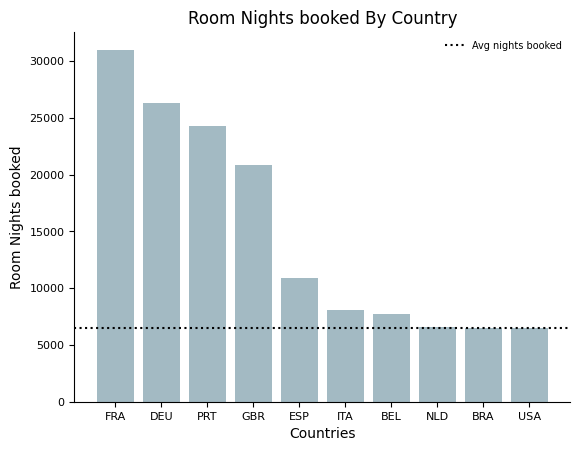

In [13]:
# creating the figure and axes objects. (Single Color for all the bars)
fig, ax = plt.subplots()

# plotting the bar chart
ax.bar(x = countries.index, 
       height = countries["RoomNights"],
       color = "#A3BAC3"    
      );

#Setting the title for the plot
ax.set_title("Room Nights booked By Country");

#Setting the x axis
ax.set_xlabel("Countries");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Room Nights booked");
plt.yticks(fontsize = 8);

#adding the horizontal line
ax.axhline(y = mean_nights_booked, color = "black", ls = ":")

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)

# Adding the legend
ax.legend(["Avg nights booked"], loc = "upper right", fontsize = 7, frameon = False);

Althought the concept of Legend has been introduced in previous notebook, We will look at some advanced concepts for the legends here. We will put the legend for the bars above based on the region. Below are segregation.  

Region: <br>
North Europe: GBR color: E2E2E2
<br>
Western Europe: FRA, DEU, BEL, NLD color: 6E7E85
<br>
Southern Europe:ITA, ESP, PRT color: B7CECE
<br>
South/Latin America:BRA color: BBBAC6
<br>
North America: USA color: 1C0F13

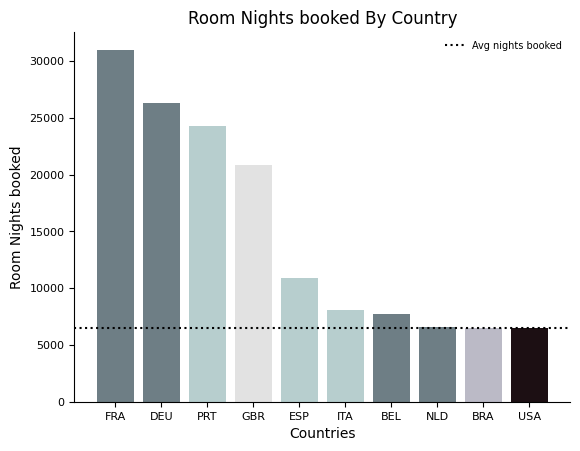

In [14]:
# creating the figure and axes objects. (different COlor for the bars based on above regional categorization)
fig, ax = plt.subplots()


Color_list = ["#6E7E85","#6E7E85","#B7CECE","#E2E2E2","#B7CECE","#B7CECE","#6E7E85","#6E7E85","#BBBAC6","#1C0F13"]

# plotting the bar chart
ax.bar(x = countries.index, 
       height = countries["RoomNights"],
       color = Color_list   
      );

#Setting the title for the plot
ax.set_title("Room Nights booked By Country");

#Setting the x axis
ax.set_xlabel("Countries");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Room Nights booked");
plt.yticks(fontsize = 8);

#adding the horizontal line
ax.axhline(y = mean_nights_booked, color = "black", ls = ":")

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)

# Adding the legend
ax.legend(["Avg nights booked"], loc = "upper right", fontsize = 7, frameon = False);

#### Making Custom Legends

So in the above chart we have colored the bars based on the region they are in. But for our audience to know the markation, we need to add the custom legends, to show which region does each color represents.<br>
We would need help from the <b>patches</b> module in matplotlib. This helps  us create a legend which is totally disconnected from the chart. <br>
The patches module helps in creating a small colored rectangle, which a label attached to it and then we pass these patches (tuple of color mapping) to legend function with the argument <b>handles</b>

In [15]:
import matplotlib.patches as mpatch

Text(11, 5295, '6495')

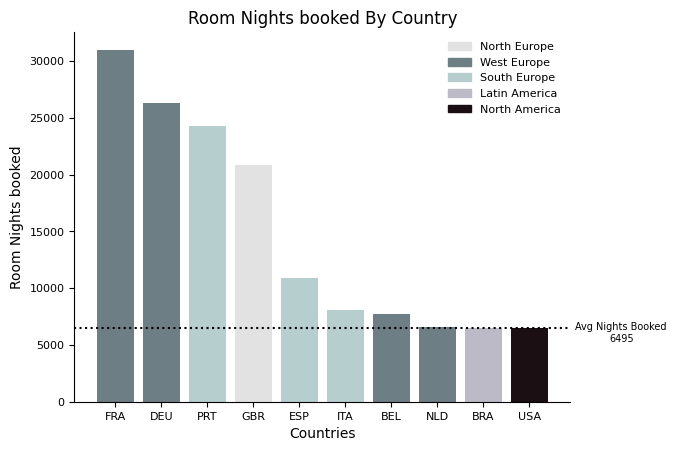

In [16]:
#Adding custom legend to the chart. 
fig, ax = plt.subplots()
Color_list = ["#6E7E85","#6E7E85","#B7CECE","#E2E2E2","#B7CECE","#B7CECE","#6E7E85","#6E7E85","#BBBAC6","#1C0F13"]

# plotting the bar chart
ax.bar(x = countries.index, 
       height = countries["RoomNights"],
       color = Color_list   
      );

#Setting the title for the plot
ax.set_title("Room Nights booked By Country");

#Setting the x axis
ax.set_xlabel("Countries");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Room Nights booked");
plt.yticks(fontsize = 8);

#adding the horizontal line
ax.axhline(y = mean_nights_booked, color = "black", ls = ":")

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)


#creating the patches for legend function
NorthEuro = mpatch.Patch(color = "#E2E2E2", label = "North Europe")
WestEuro = mpatch.Patch(color = "#6E7E85", label = "West Europe")
SouthEuro = mpatch.Patch(color = "#B7CECE", label = "South Europe")
LatAmr = mpatch.Patch(color = "#BBBAC6", label = "Latin America")
NothAmr = mpatch.Patch(color = "#1C0F13", label = "North America")

#Adding the legend
plt.legend(handles = [NorthEuro,WestEuro, SouthEuro , LatAmr, NothAmr], loc = "upper right", fontsize = 8, frameon = False);


#Adding the text on the horizontal line
ax.text(10,mean_nights_booked-200, "Avg Nights Booked", size = 7)
ax.text(11,mean_nights_booked-1200, mean_nights_booked, size = 7, ha = "center")

#### Adding Data Labels to the chart

The Chart above can be further enhanced by adding the data labels on the bar chart.<br>
For the bar chart, we will use <b>text annotation</b> method to add the text at the desired location.<br>
We will run a for loop through the entire bar chart - taking one bar at a time,calculating its height and width, and placing the text at the center of the bar. <br>
We can also use the simple <b>ax.text</b> function to add the Data Labels to the bar chart <br>
Matplotlib as also add a method <font color = "red"> ax.bar_label()</font> to add the data labels automatically in the bar chart without the need of running the for loop

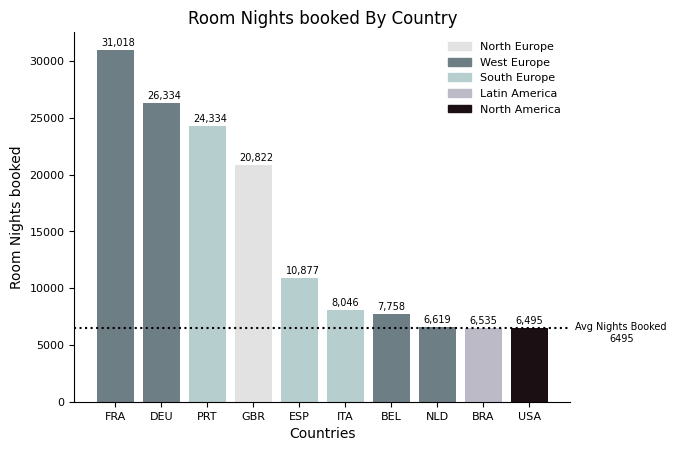

In [17]:
#Adding the Data Labels in the previous chart
fig, ax = plt.subplots()
Color_list = ["#6E7E85","#6E7E85","#B7CECE","#E2E2E2","#B7CECE","#B7CECE","#6E7E85","#6E7E85","#BBBAC6","#1C0F13"]

# plotting the bar chart
barchart = ax.bar(x = countries.index, 
                  height = countries["RoomNights"],
                  color = Color_list   
                  );

#Setting the title for the plot
ax.set_title("Room Nights booked By Country");

#Setting the x axis
ax.set_xlabel("Countries");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Room Nights booked");
plt.yticks(fontsize = 8);

#adding the horizontal line
ax.axhline(y = mean_nights_booked, color = "black", ls = ":")

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)


#creating the patches for legend function
NorthEuro = mpatch.Patch(color = "#E2E2E2", label = "North Europe")
WestEuro = mpatch.Patch(color = "#6E7E85", label = "West Europe")
SouthEuro = mpatch.Patch(color = "#B7CECE", label = "South Europe")
LatAmr = mpatch.Patch(color = "#BBBAC6", label = "Latin America")
NothAmr = mpatch.Patch(color = "#1C0F13", label = "North America")


# Adding the legend
plt.legend(handles = [NorthEuro,WestEuro, SouthEuro , LatAmr, NothAmr], loc = "upper right", fontsize = 8, frameon = False);


# Adding the text on the horizontal line
ax.text(10,mean_nights_booked-200, "Avg Nights Booked", size = 7)
ax.text(11,mean_nights_booked-1200, mean_nights_booked, size = 7, ha = "center")

# Adding the Data labels. 
for bar in barchart:
    height = bar.get_height()
    ax.annotate("{:,}".format(height.round()), 
               xy = ((bar.get_x()-0.3) + bar.get_width()/2, height.round()), 
               xytext = (0,3), textcoords="offset points", size  = 7)


#### Building a horizontal bar chart of lodging revenue by country for the same countries as above

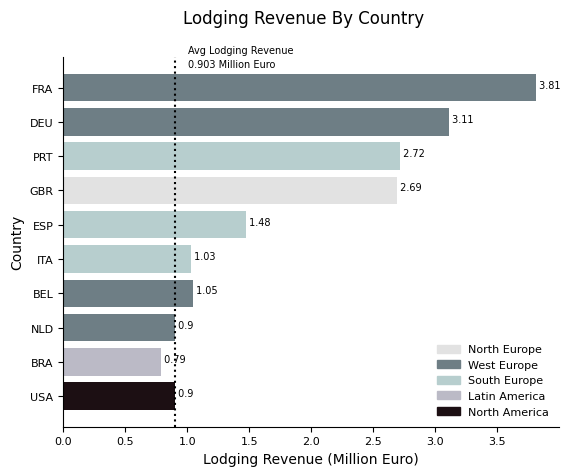

In [18]:
#Building the Horizontal Bar chart
fig, ax = plt.subplots()
Color_list = ["#6E7E85","#6E7E85","#B7CECE","#E2E2E2","#B7CECE","#B7CECE","#6E7E85","#6E7E85","#BBBAC6","#1C0F13"]

# plotting the bar chart
barhchart = ax.barh(y = countries.index[::-1], 
                  width = countries["LodgingRevenue"][::-1]/1000000,
                  color = Color_list[::-1]   
                  );

#Setting the title for the plot
fig.suptitle("Lodging Revenue By Country");

#Setting the x axis
ax.set_xlabel("Lodging Revenue (Million Euro)");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Country");
plt.yticks(fontsize = 8);

#adding the vertical line for the mean
ax.axvline(x = mean_LodgingRevenue/1000000, color = "black", ls = ":")

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)


#creating the patches for legend function
NorthEuro = mpatch.Patch(color = "#E2E2E2", label = "North Europe")
WestEuro = mpatch.Patch(color = "#6E7E85", label = "West Europe")
SouthEuro = mpatch.Patch(color = "#B7CECE", label = "South Europe")
LatAmr = mpatch.Patch(color = "#BBBAC6", label = "Latin America")
NothAmr = mpatch.Patch(color = "#1C0F13", label = "North America")


# Adding the legend
plt.legend(handles = [NorthEuro,WestEuro, SouthEuro , LatAmr, NothAmr], loc = "lower right", fontsize = 8, frameon = False);


# Adding the text on the horizontal line
ax.text((mean_LodgingRevenue/1000000)+0.10,10, "Avg Lodging Revenue", size = 7);
ax.text((mean_LodgingRevenue/1000000)+0.10,9.6, "{} Million Euro".format(round((mean_LodgingRevenue/1000000),3)), size = 7);

# Adding the Data labels. 
for bar in barhchart:
    width = bar.get_width()
    height = bar.get_y() + bar.get_height()/2
    ax.text(width,height," {}".format(width.round(2)), size = 7)

### <font color='005377'> Stacked Bar chart </font>

It is created by stacking our series from different categories togther to get the single bar. We use the same function <font color = "red">ax.bar()</font> for creating the stacked bar chart, but with an added argument <b>bottom = series</b> - 
This will use the values from the passed series as the baseline for the stacked bars instead of x-axis. <br> 
<br>

<b> 100% Stacked Bar chart</b><br>
100% stacked bar chart - cares less about the to totals, and more about how each category contributes to the overall total. <br> To create a stacked bar chart, convert the dataframe to row level percentage before plotting. To create a 100% bar chart, we dont modify the matplotlib code, but the representation of our data where we calculate the percentage contribution of each column. 

#### Creating a Stack Bar chart for top 5 countries for Lodging Revenue and other revenue. 
This will give us the idea of how both these revenue sources contribute to the total revenue. 

In [19]:
# Creating the required dataset
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
country_subset = (hotels
                  .loc[hotels["Nationality"].isin(countries)]
                  .groupby("Nationality")

                  .agg({"LodgingRevenue": "sum", "OtherRevenue":"sum" })
                  .sort_values("LodgingRevenue", ascending=False))

country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


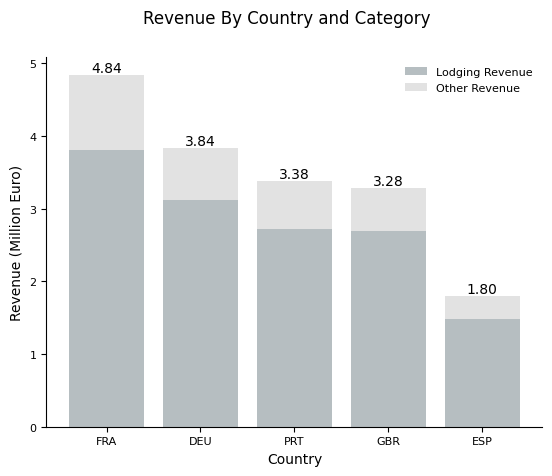

In [20]:
#Creating the stack bar bar chart for Lodging revenue and Other revenue
fig, ax = plt.subplots()

# creating the bar first bar chart, Since Lodging revenue is our main revenue, keeping it as the first stack
barchart = ax.bar(x = country_subset.index, 
       height = country_subset["LodgingRevenue"]/1000000, 
       color = "#6E7E85", 
       alpha = 0.5, 
       label = "Lodging Revenue");

# Adding the second stack of Other revenue on the plotted bar chart
stackbarchart = ax.bar(x = country_subset.index,
                       height = country_subset["OtherRevenue"]/1000000, 
                       bottom = country_subset["LodgingRevenue"]/1000000, 
                       color="#E2E2E2" , 
                       label = "Other Revenue");


#Setting the title for the plot
fig.suptitle("Revenue By Country and Category");

#Setting the x axis
ax.set_xlabel("Country");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Revenue (Million Euro)")
plt.yticks(fontsize = 8);

#Removing the broders
ax.spines[["top", "right"]].set_visible(False)

#Adding the legend
plt.legend(loc = "upper right", fontsize = 8, frameon = False);

# Adding the Data labels. 
ax.bar_label(stackbarchart, fmt='%.2f');


#### Building a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Also, Adding a reference line at 80%, which is our baseline.

In [21]:
#Modifying our dataset for the 100% stacked barchart
country_subset_pcts = country_subset.apply(lambda x: x * 100 / sum(x), axis=1)
country_subset_pcts.head(1)

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471


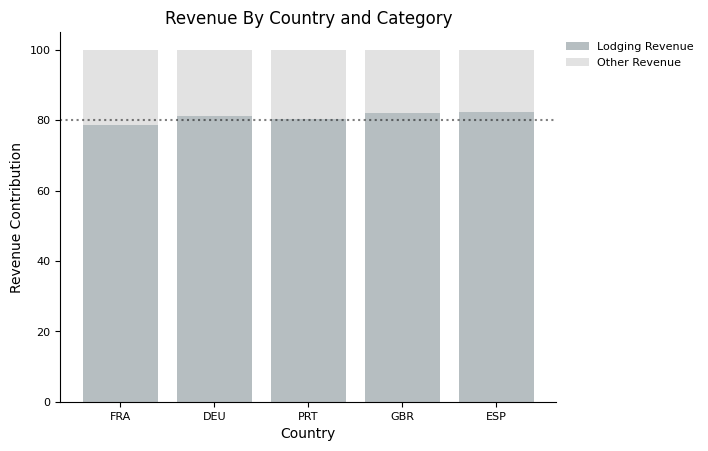

In [22]:
# We will use the same code as the stacked bar chart, with the modified dataset
fig, ax = plt.subplots()

# creating the bar first bar chart, Since Lodging revenue is our main revenue, keeping it as the first stack
barchart = ax.bar(x = country_subset_pcts.index, 
       height = country_subset_pcts["LodgingRevenue"], 
       color = "#6E7E85", 
       alpha = 0.5, 
       label = "Lodging Revenue");

# Adding the second stack of Other revenue on the plotted bar chart
stackbarchart = ax.bar(x = country_subset_pcts.index,
                       height = country_subset_pcts["OtherRevenue"], 
                       bottom = country_subset_pcts["LodgingRevenue"], 
                       color="#E2E2E2" , 
                       label = "Other Revenue");


#Setting the title for the plot
ax.set_title("Revenue By Country and Category");

#Setting the x axis
ax.set_xlabel("Country");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Revenue Contribution")
plt.yticks(fontsize = 8);

#Adding a horizontal line at 80%
ax.axhline(y = 80, color="black", ls = ":", alpha = .50)


#Removing the broders
ax.spines[["top", "right"]].set_visible(False)

#Adding the legend
plt.legend(bbox_to_anchor = (1,1), fontsize = 8, frameon = False);

### <font color='005377'> Grouped Bar chart</font>

With group bar, we allow one bar for each category without stacking. For this we have to make as many bars as there are category. 
<br>
For creating the grouped bar chart, we take use of the two parameters from <b>ax.bar()</b> function: x (horizontal coordinates of the bar) and width (it is the width(s) of the bars with default value 0.8). We call the ax.bar() function with the different x-axis position to draw bar for different individual category, so that they form a group around the X-Label 

<br>
<b>Notes</b><br>
much easier to create such chart in Seaborn library. 
You can create a grouped bar chart by reducing the width of each series and shifting them evenly arounnd their corresponding level. 

#### Will now be plotting the Group bar chart for the LodgingRevenue and OtherRevenue for the top 5 countries. 

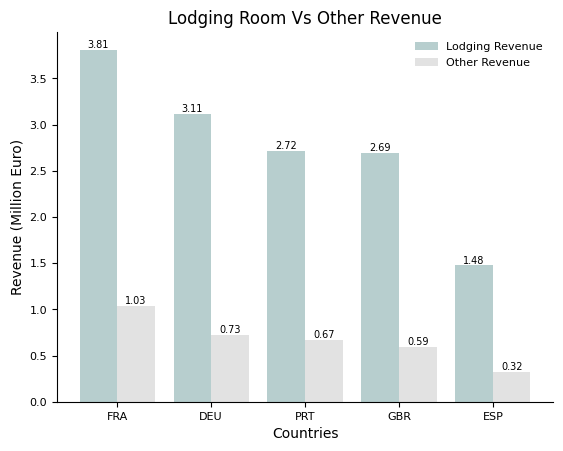

In [23]:
#Plotting a grouped bar chart for the above data
fig, ax = plt.subplots()

#we cant pass country_subset.index for x axis, we have to pass the integer so that we can manipulate the bar location
x = np.arange(5)

# Plotting the bar chart
barchart = ax.bar(x-0.2, 
                  height = country_subset["LodgingRevenue"]/1000000,
                  color = "#B7CECE",
                  width = 0.4, 
                  label = "Lodging Revenue"
                  );

# The Width of each bar in the above Chart is 0.8, and the padding between each 0.2, 
#you can get this information from the following code:
# for bar in barchart:
#     print (bar.get_width(), bar.get_x())


# Plotting the second bar bar chart
barchart2 = ax.bar(x+0.2, 
                  height = country_subset["OtherRevenue"]/1000000,
                  color = "#E2E2E2", 
                  width = 0.4, 
                  label = "Other Revenue"
                  );



#Setting the title for the plot
ax.set_title("Lodging Room Vs Other Revenue");

#Setting the x axis
ax.set_xlabel("Countries");
plt.xticks(fontsize = 8, ticks = x,labels = country_subset.index);

#setting the y axis
ax.set_ylabel("Revenue (Million Euro)");
plt.yticks(fontsize = 8);

# Removing the broders
ax.spines[["top", "right"]].set_visible(False)

#Adding the legend
plt.legend(loc = "upper right", fontsize = 8, frameon = False);


# # Adding the Data labels. 
ax.bar_label(barchart, fmt = "%.2f", size = 7);
ax.bar_label(barchart2, fmt = "%.2f", size = 7);


### <font color='005377'> Combo Chart <font color='005377'>

A single chart which have multiple chart type. You can create combo chart by specifying differnt chart types in dual axis plot. 

In [24]:
# Creating the required dataset
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

countries_overall = (hotels
                  .loc[hotels["Nationality"].isin(countries)]
                  .groupby("Nationality")
                  .agg({"LodgingRevenue": "sum", "OtherRevenue":"sum" , "RoomNights":"sum"})
                  .sort_values("LodgingRevenue", ascending=False))


In [25]:
countries_overall

,LodgingRevenue,OtherRevenue,RoomNights
Nationality,,,
FRA,3809315.59,1033166.30,31018
DEU,3113382.55,725541.53,26334
PRT,2715008.72,665634.58,24334
GBR,2693123.61,591212.77,20822
ESP,1475909.33,319840.82,10877


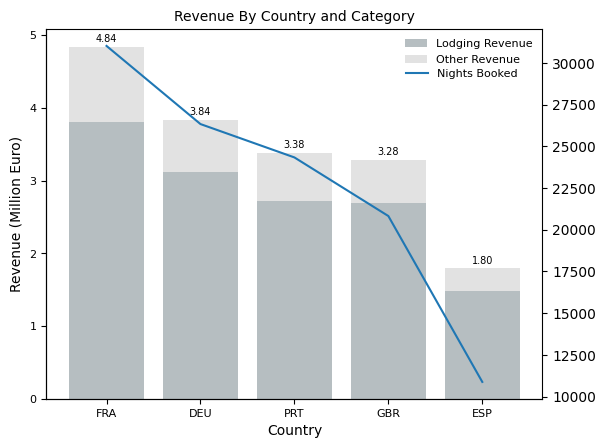

In [26]:
#Creating a combo chart
fig, ax = plt.subplots()

# creating the bar first bar chart, Since Lodging revenue is our main revenue, keeping it as the first stack
barchart = ax.bar(x = countries_overall.index, 
       height = countries_overall["LodgingRevenue"]/1000000, 
       color = "#6E7E85", 
       alpha = 0.5, 
       label = "Lodging Revenue");

# Adding the second stack of Other revenue on the plotted bar chart
stackbarchart = ax.bar(x = countries_overall.index,
                       height = countries_overall["OtherRevenue"]/1000000, 
                       bottom = countries_overall["LodgingRevenue"]/1000000, 
                       color="#E2E2E2" , 
                       label = "Other Revenue");

#Setting the title for the plot
ax.set_title("Revenue By Country and Category", size = 10);

#Setting the x axis
ax.set_xlabel("Country");
plt.xticks(fontsize = 8);

#setting the y axis
ax.set_ylabel("Revenue (Million Euro)")
plt.yticks(fontsize = 8);



ax_sec = ax.twinx()

line =  ax_sec.plot(countries_overall.index,  countries_overall["RoomNights"], label ="Nights Booked")


#Removing the broders
ax.spines[["top", "right"]].set_visible(False)

#Adding the legend
ax_sec.legend(bbox_to_anchor = (0.97,0.92), fontsize = 8, frameon = False);
ax.legend(bbox_to_anchor = (1,1), fontsize = 8, frameon = False);

# Adding the Data labels. 
ax.bar_label(stackbarchart, fmt='%.2f', size = 7, padding = 2);


### <font color='005377'>Pie & Donut Chart</font>
Pie chart are used to compare the proportion totallling 100%<br>
To create the pie chart we will use the <font color = "red">ax.pie()</font> method with the following arguments: <br>
series value, labels = , startangle = , autopct = , pctdistance = , explode =  <br>

<br>
<b>Donut Chart</b><br>
You can create a donut chart by adding a <b>hole</b> to the pie chart and shifting the labels<br>
We draw the circle with <font color = "red">plt.circle()</font><br>
Arguments: center(x,y), radius, and color)


<b>Tips</b><br>
Do not add too many slices, else it will be hard to read the pie chart. <br>
Use a bar chart if you interested in showing the actual number and comparision, pie charts are used for showing how they make up the whole.<br>
you can use the Pie chart to make the progress chart as well. 

#### Building a pie chart of LodgingRevenue by country. Will include a slice for our top 5 countries and combine the rest into an 'other' Category.

In [27]:
country_pcts = (hotels
                .groupby("Nationality")
                .agg({"LodgingRevenue": "sum"})
                .sort_values("LodgingRevenue", ascending=False)
                .apply(lambda x: x * 100 / sum(x)))

In [29]:
pie_data = (pd.concat([country_pcts.iloc[:5], 
                       pd.DataFrame(
                           {
                               "LodgingRevenue": country_pcts.iloc[5:, 0].sum()
                           }
                           , index=["OTH"])]
                     )
           ).iloc[::-1]

In [30]:
pie_data

,LodgingRevenue
OTH,44.721890
ESP,5.909105
GBR,10.782472
PRT,10.870093
DEU,12.465065
FRA,15.251375


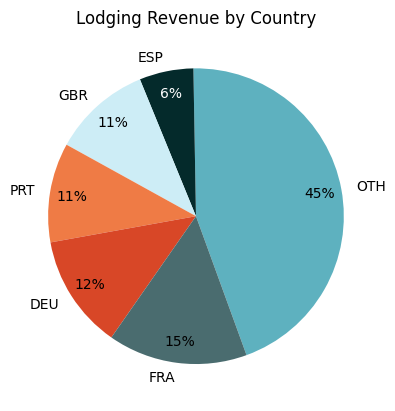

In [31]:
#Plotiing the pie chart
fig, ax = plt.subplots()

#creating a color palette for the pie chart
color = [ "#5eb1bf","#042a2b", "#cdedf6", "#ef7b45",  "#d84727", "#4A6C6F"]

#creating the pie chart
piechart = ax.pie(pie_data["LodgingRevenue"], 
                  labels = pie_data.index, 
                  startangle = -70, 
                  autopct="%.0f%%",     
                  pctdistance=0.85, colors=color);

# Adjusting the Auto text for ESP as the autopercent is not visible. 
piechart[2][1].set_color("white")


#title
ax.set_title("Lodging Revenue by Country");

#### Making a donut chart from the above chart


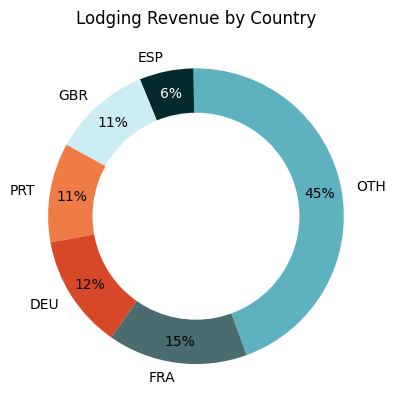

In [32]:
#Plotiing the pie chart
fig, ax = plt.subplots()

#creating a color palette for the pie chart
color = [ "#5eb1bf","#042a2b", "#cdedf6", "#ef7b45",  "#d84727", "#4A6C6F"]

#creating the pie chart
piechart = ax.pie(pie_data["LodgingRevenue"], 
                  labels = pie_data.index, 
                  startangle = -70, 
                  autopct="%.0f%%",     
                  pctdistance=0.85, colors=color);

# Adjusting the Auto text for ESP as the autopercent is not visible. 
piechart[2][1].set_color("white")

circle = plt.Circle((0,0), 0.70,fc= "white")
fig.gca().add_artist(circle)


#title
ax.set_title("Lodging Revenue by Country");

### <font color='005377'>Scatter & Bubble chart</font>

Scatter plots are used to visualize the relationshp between the numerical value.<font color = "red">ax.scatter</font> is used to create the scatter plot with the following arguments: x-axis series, y-axis series, size and alpha)

<b>Bubble chart</b> is created when the the plot size is based on some third variable. when we pass the third series as the parameter for size and size is determined by the values in that series. 

#### Buillding a scatterplot comparing average nights stayed by country to average revenue per customer by country. Then, we will build a bubble chart by specifying the size of the bubbles as the average nightly revenue.

In [33]:
#Preparing the data for the chart
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                       revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"]
                      )

In [34]:
agg_hotels = hotels.groupby("Nationality").agg(
                                  total_revenue = ("total_revenue", "sum"),
                                  avg_revenue = ("total_revenue", "mean"),
                                  avg_age = ("Age", "mean"),
                                  avg_nights = ("RoomNights", "mean"),
                                  avg_nightly_revenue = ("revenue_per_night", "mean")
)

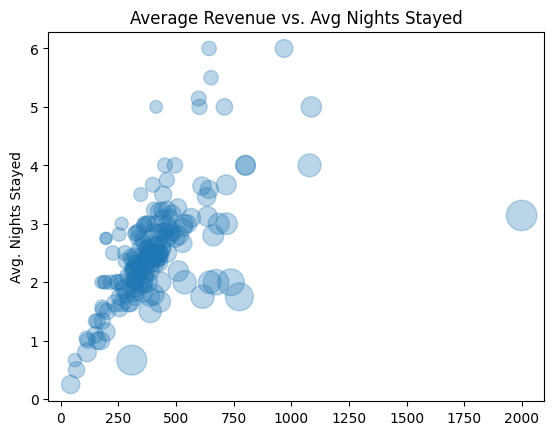

In [35]:
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels["avg_revenue"], 
    agg_hotels["avg_nights"], 
    s=agg_hotels["avg_nightly_revenue"],
    alpha=.3
);

ax.set_title("Average Revenue vs. Avg Nights Stayed");
ax.set_ylabel("Avg. Nights Stayed");

### <font color='005377'>Histogram</font>

Histogram are used to visualize he distribution of the numeric variable<br>
Use <font color = "red">ax.hist()</font> with the following parameters: series, density, alpha, bins



<br><b>Tips</b><br>
1. Modify the alpha level of the plot if we need to plot multiple distribution on the same plot
2. When we turn density = True, we get the relative frequncy on the y axis, as opposed to actual value. Can be used to compare the two numerical varriables which may have diffeent scales 

#### building a histogram comparing customer age in Germany to the Customer age in france.

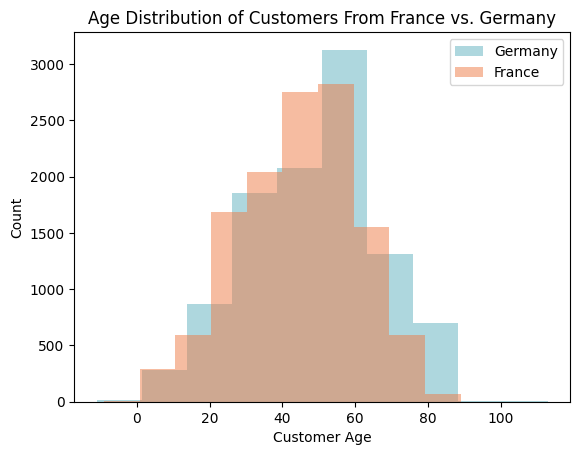

In [37]:
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"] == "DEU", "Age"],color = "#5eb1bf" , alpha=.5);
ax.hist(hotels.loc[hotels["Nationality"] == "FRA", "Age"], color = "#ef7b45", alpha=.5);

ax.set_title("Age Distribution of Customers From France vs. Germany")
ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")

ax.legend(["Germany", "France"]);